# Chapter 2 - R Exercises

In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## Exercise 2.17

Create data frame with trees (18% infected):

In [2]:
trees <- data.frame( infected=rbernoulli(10000, p=0.18) )
table( trees )

Warning message:
“`rbernoulli()` was deprecated in purrr 1.0.0.”


trees
FALSE  TRUE 
 8210  1790 

Add infection rate:

In [3]:
trees <- trees %>% mutate( maple_rate=ifelse(infected, 0.8, 0.1))
head( trees )

,infected,maple_rate
,<lgl>,<dbl>
1,FALSE,0.1
2,FALSE,0.1
3,FALSE,0.1
4,FALSE,0.1
5,FALSE,0.1
6,TRUE,0.8


In [4]:
trees <- trees  %>% mutate( is_maple=rbinom(nrow(trees), size=1, prob=maple_rate) )
head( trees )

,infected,maple_rate,is_maple
,<lgl>,<dbl>,<int>
1,FALSE,0.1,0
2,FALSE,0.1,0
3,FALSE,0.1,1
4,FALSE,0.1,0
5,FALSE,0.1,0
6,TRUE,0.8,1


Conditional probability P(infected|tree is maple):

In [5]:
trees %>% filter( is_maple==1 ) %>% summarise( prob=mean(infected) )

prob
<dbl>
0.6407374


More or less close to theoretical result!

## Exercise 2.18

Simulate number of lactose intolerant people with the given proportion 10'000 times:

In [6]:
people <- data.frame(
    pi=sample( c(0.4, 0.5, 0.6, 0.7), size=10000, replace=TRUE, prob=c(0.1,0.2,0.44,0.26)  )
)
people <- people %>% mutate(intol = rbinom(nrow(people), size=80, prob=pi))
head( people )

,pi,intol
,<dbl>,<int>
1,0.5,46
2,0.6,45
3,0.5,31
4,0.6,52
5,0.7,55
6,0.6,48


Conditional probability P( pi | y=47 ):

In [7]:
people %>% 
    filter( intol==47 ) %>% 
    group_by( pi ) %>% 
    summarise( n=n() ) %>% 
    mutate( prop=n/sum(n) )

pi,n,prop
<dbl>,<int>,<dbl>
0.5,51,0.11538462
0.6,369,0.83484163
0.7,22,0.04977376


The achieved values more or less compare with the posterior from exercise 2.13 b). Often, no value is given for $\pi=0.4$, since the prior probability is too low to reach a sufficient number of lactose intolerance people to enter the summary:

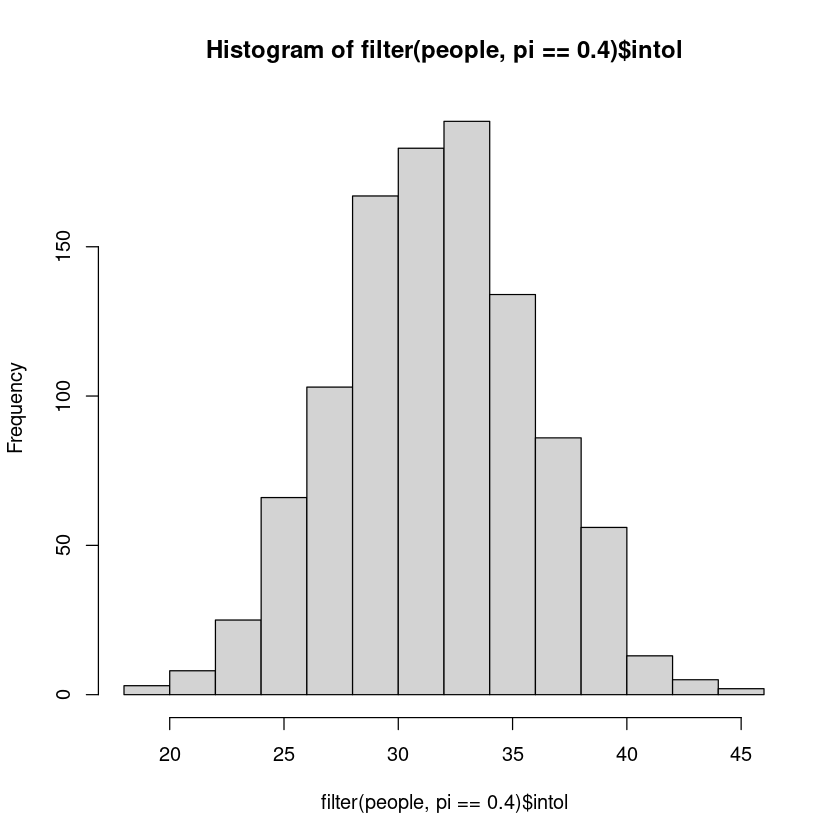

In [8]:
hist( filter(people, pi==0.4)$intol )

Changing size to 100'000:

In [9]:
people <- data.frame(
    pi=sample( c(0.4, 0.5, 0.6, 0.7), size=100000, replace=TRUE, prob=c(0.1,0.2,0.44,0.26)  )
)
people <- people %>% mutate(intol = rbinom(nrow(people), size=80, prob=pi))
people %>% 
    filter( intol==47 ) %>% 
    group_by( pi ) %>% 
    summarise( n=n() ) %>% 
    mutate( prop=n/sum(n) )

pi,n,prop
<dbl>,<int>,<dbl>
0.4,4,0.0008635579
0.5,529,0.1142055268
0.6,3827,0.8262089810
0.7,272,0.0587219344


This is now closer.

## Exercise 2.19

In [10]:
cuckoo <- data.frame(
    pi=sample( c(0.6, 0.65, 0.7, 0.75), size=10000, replace=TRUE, prob=c(0.3,0.4,0.2,0.1)  )
)
cuckoo <- cuckoo %>% mutate( hatchlings=rbinom(nrow(cuckoo), size=15, prob=pi) )
cuckoo %>% 
    filter( hatchlings==10 ) %>% 
    group_by( pi ) %>% 
    summarise( n=n() ) %>% 
    mutate( prop=n/sum(n) )

pi,n,prop
<dbl>,<int>,<dbl>
0.60,551,0.28285421
0.65,848,0.43531828
0.70,389,0.19969199
0.75,160,0.08213552


More or less the same!

## Exercise 2.20

Given: $P(\text{cat}) = 0.08$, $P(\text{predicted cat} | \text{cat}) = 0.8$, $P(\text{predicted cat} | \text{no cat}) = 0.5$

Desired: $P(\text{cat} | \text{predicted cat})$

### Analytic computation:

$P(\text{cat}|\text{predicted cat}) = \frac{P(\text{predicted cat}|\text{cat}) \, P(\text{cat})}{P(\text{predicted cat})} = \frac{P(\text{predicted cat}|\text{cat}) \, P(\text{cat})}{P(\text{predicted cat}|\text{cat}) \, P(\text{cat}) + P(\text{predicted cat}|\text{no cat}) \, P(\text{no cat})} = \frac{0.8 \cdot 0.08}{0.8 \cdot 0.08 + 0.5 \cdot 0.92}$

In [11]:
0.8*0.08 / (0.8*0.08 + 0.5*0.92)

[1] 0.1221374

### Simulation:

In [12]:
images <- data.frame( is_cat=rbernoulli(10000, p=0.08) ) %>% 
    mutate( predicted_cat_prop=ifelse(is_cat, 0.8, 0.5)) %>% 
    mutate( predicted_cat=rbinom(10000, size=1, prob=predicted_cat_prop) ) %>% 
    filter( predicted_cat==1 ) %>% 
    group_by( is_cat ) %>% 
    summarise( n=n() ) %>% 
    mutate( proportion=n/sum(n) )
head( images, 20 )

is_cat,n,proportion
<lgl>,<int>,<dbl>
FALSE,4441,0.8689102
TRUE,670,0.1310898


Pretty close!

## Exercise 2.21

Exercise 2.21 (Medical tests) A medical test is designed to detect a disease that about 3% of the population has. For 93% of those who have the disease, the test yields a positive result. In addition, the test falsely yields a positive result for 7% of those without the disease. What is the probability that a person has the disease given that they have tested positive? Answer this question by simulating data for 10,000 people. 

$A$: 'person has disease', $B$: 'person is tested positive'

Given: $P(A) = 0.03$, $P(\neg A) = 0.97$, $P(B|A) = 0.93$, $P(B|\neg A) = 0.07$

Desired: $P(A|B)$

### Analytic computation:

$P(A|B) = \frac{P(B|A) \, P(A)}{P(B)} = \frac{P(B|A) \, P(A)}{P(B|A) \, P(A) + P(B|\neg A) \, P(\neg A)} = \frac{0.93 \cdot 0.03}{0.93 \cdot 0.03 + 0.07 \cdot 0.97}$

In [13]:
0.93 * 0.03 / (0.93 * 0.03 + 0.07 * 0.97)

[1] 0.2912317

### Simulation:

In [14]:
images <- data.frame( has_disease=rbernoulli(10000, p=0.03) ) %>% 
    mutate( positive_prop=ifelse(has_disease, 0.93, 0.07)) %>% 
    mutate( tested_positive=rbinom(10000, size=1, prob=positive_prop) ) %>% 
    filter( tested_positive==1 ) %>% 
    group_by( has_disease ) %>% 
    summarise( n=n() ) %>% 
    mutate( proportion=n/sum(n) )
head( images, 20 )

has_disease,n,proportion
<lgl>,<int>,<dbl>
FALSE,720,0.7114625
TRUE,292,0.2885375
